# Coding Assignment 1
### Jack Kovach: NetID jkovach2 and Matthew Lopes: NetID mlopes2

Kovach UIN used for seed: 662871852

## Data Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn

# Set seed
np.random.seed(1852) ## Last 4 Digits of Kovach UIN

In [2]:
p = 2
csize = 10
sigma = 1
m1 = np.random.normal(size = (csize, p)) * sigma + np.concatenate([np.array([[1, 0]] * csize)])
m0 = np.random.normal(size = (csize, p)) * sigma + np.concatenate([np.array([[0, 1]] * csize)])

class sim_params :
    csize = 10           # number of centers
    p = 2                # dimension
    s = np.sqrt(1 / 5)   # standard deviation for generating data
    n = 100              # training size per class
    N = 5000             # test size per class
    m0 = m0              # 10 centers for class 0
    m1 = m1              # 10 centers for class 1

In [3]:
def generate_sim_data(sim_params):

    p = sim_params.p
    s = sim_params.s
    n = sim_params.n
    N = sim_params.N
    m1 = sim_params.m1
    m0 = sim_params.m0
    csize = sim_params.csize
    
    id1 = np.random.randint(csize, size = n)
    id0 = np.random.randint(csize, size = n)

    Xtrain = np.random.normal(size = (2 * n, p)) * s \
                + np.concatenate([m1[id1,:], m0[id0,:]])
    Ytrain = np.concatenate(([1]*n, [0]*n))

    id1 = np.random.randint(csize, size = N)
    id0 = np.random.randint(csize, size = N)
    Xtest = np.random.normal(size = (2 * N, p)) * s \
                + np.concatenate([m1[id1,:], m0[id0,:]])
    Ytest = np.concatenate(([1]*N, [0]*N))

    return Xtrain, Ytrain, Xtest, Ytest

In [4]:
Xtrain, Ytrain, Xtest, Ytest = generate_sim_data(sim_params)

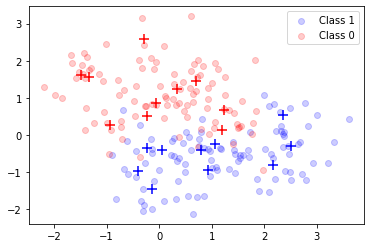

In [5]:
n = sim_params.n
m0 = sim_params.m0        
m1 = sim_params.m1

plt.figure()
plt.scatter(Xtrain[:n, 0], Xtrain[:n, 1], 
            color = 'blue', alpha = 0.2, label = 'Class 1')
plt.scatter(Xtrain[n:, 0], Xtrain[n:, 1], 
            color = 'red', alpha = 0.2, label = 'Class 0')
plt.scatter(m1[:, 0], m1[:, 1], marker = '+', color = 'blue', s = 120)
plt.scatter(m0[:, 0], m0[:, 1], marker = '+', color = 'red', s = 120)
plt.legend()
plt.show()

## Part 1: KNN

Our KNN Implementation

Reference: https://towardsdatascience.com/k-nearest-neighbors-classification-from-scratch-with-numpy-cb222ecfeac1

In [6]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

In [7]:
def kneighbors(X_test, k):
       
        #n_neighbors = k
        dist = []
        neigh_ind = []
        
        # get all euclidean distances for each point in the dataset
        # Distances calculated here - order maintained for ties when enumerated
        
        point_dist = [euclidian_distance(x_test, Xtrain) for x_test in X_test]
        
        for row in point_dist:
            enum_neigh = enumerate(row)
            
            #sorting the distances and picking the top rows
            sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]
        
            #Splitting indicies and distances from the sorted neighbors list for single row
            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]
            
            #adding to total list for all of the rows
            dist.append(dist_list)
            neigh_ind.append(ind_list)
        
        return np.array(neigh_ind)

In [8]:
def predict(X_test, k):

        neighbors = kneighbors(X_test, k)
        Ypred = np.array([np.argmax(np.bincount(Ytrain[neighbor])) for neighbor in neighbors])
        
        return Ypred 

In [9]:
def confusion_matrix(Ytrue, Ypred):
    return np.bincount(Ytrue + 2*Ypred).reshape(2, 2)

In [10]:
def our_knn(X_test, k):
    Ypred = predict(X_test, k)
    
    return Ypred, np.mean(Ypred != Ytest)

#### KNN from sklearn

In [11]:
def sklearn_knn(k):
    knn_model = knn(k)
    knn_model.fit(Xtrain, Ytrain)
    test_pred = knn_model.predict(Xtest)
    
    return test_pred, np.mean(test_pred != Ytest)

### Part 1: Distance Ties and Voting Ties

#### Distance Ties
For distance ties, the algorithm will take the smallest index provided by the python enumerate function on all the distances for each single point, which maintains the order of the originally calculated distances for that point (highlighted code with comment "Distances calculated here"). 

#### Voting Ties
Voting ties are handled in the predict function by the np.argmax function's default behavior. Ypred is created from finding the argmax of the number of occurences of each neighbor in Ytrain. In the case of a tie, argmax will return lowest index of the tied maximums - this is the chosen label to be assigned for voting. 

###  Part 1: Test Runs for K = 1, K = 3, K = 5

#### K=1

In [12]:
k = 1
our_knn_results = our_knn(Xtest, k)
sklearn_knn_results = sklearn_knn(k)

print("Our implementation of KNN:", our_knn_results[1])
print("sklearn implementation of KNN:", sklearn_knn_results[1])

Our implementation of KNN: 0.13
sklearn implementation of KNN: 0.13


In [13]:
print("Sklearn K=1 KNN Results Table")
print()
print(pd.crosstab(sklearn_knn_results[0], Ytest))

Sklearn K=1 KNN Results Table

col_0     0     1
row_0            
0      4345   645
1       655  4355


In [14]:
print("Our K=1 KNN Results Table")
print()
print(pd.crosstab(our_knn_results[0], Ytest))

Our K=1 KNN Results Table

col_0     0     1
row_0            
0      4345   645
1       655  4355


#### K=3

In [15]:
k = 3

our_knn_results = our_knn(Xtest, k)
sklearn_knn_results = sklearn_knn(k)

print("Our implementation of KNN:", our_knn_results[1])
print("sklearn implementation of KNN:", sklearn_knn_results[1])

Our implementation of KNN: 0.0987
sklearn implementation of KNN: 0.0987


In [16]:
print("Sklearn K=3 KNN Results Table")
print()
print(pd.crosstab(sklearn_knn_results[0], Ytest))

Sklearn K=3 KNN Results Table

col_0     0     1
row_0            
0      4502   489
1       498  4511


In [17]:
print("Our KNN K=3 Results Table")
print()
print(pd.crosstab(our_knn_results[0], Ytest))

Our KNN K=3 Results Table

col_0     0     1
row_0            
0      4502   489
1       498  4511


#### K=5

In [18]:
k = 5
our_knn_results = our_knn(Xtest, k)
sklearn_knn_results = sklearn_knn(k)

print("Our implementation of KNN:", our_knn_results[1])
print("sklearn implementation of KNN:", sklearn_knn_results[1])

Our implementation of KNN: 0.0987
sklearn implementation of KNN: 0.0987


In [19]:
print("Sklearn K=5 KNN Results Table")
print()
print(pd.crosstab(sklearn_knn_results[0], Ytest))

Sklearn K=5 KNN Results Table

col_0     0     1
row_0            
0      4473   460
1       527  4540


In [20]:
print("Our KNN K=5 Results Table")
print()
print(pd.crosstab(our_knn_results[0], Ytest))

Our KNN K=5 Results Table

col_0     0     1
row_0            
0      4473   460
1       527  4540


## Part 2: cv-KNN

In the second part of this assignment, you are asked to

1: Implement KNN classification with K chosen by 10-fold cross-validation;

2: Explain how you handle the non-uniquness of the optimal K values.

Candidate K values are from 1 to 180.
For this part, you are allowed to use the function knn from R package class, instead of your own KNN function from Part I.

## Compute CV Errors

First, divide the training data equally into ten folds,
then compute the prediction error on each fold using the KNN classifier trained based on the other nine folds.

Specially, in the code below, we set K = 3 and loop over runId from 1 to 10 to compute the CV error. For example, when runId = 3, we find the indices of samples in the 3rd fold (stored in testSetIndex), then train a KNN model without data in testSetIndex, and finally form prediction on data in testSetIndex.

Sample code for computing CV error for a particular K value.

In [21]:
num_folds = 10
n = len(Ytrain)
fold_size = int(n / num_folds)  
K = 3 # K = 3 for Demo Code ONLY
err = 0

indices = np.arange(n)
np.random.shuffle(indices)
index_sets = np.array_split(indices, num_folds)

traindata = Xtrain

for ifold in range(num_folds):
    train_indices =  np.delete(index_sets, obj=ifold, axis=0).ravel()
    _traindata = traindata[train_indices]
    _Ytrain = Ytrain[train_indices]
    
    test_indices = index_sets[ifold]
    _testdata = traindata[test_indices]
    _Ytest = Ytrain[test_indices]
   
    knn_model = knn(K)
    knn_model.fit(_traindata, _Ytrain)
    predict_Y = knn_model.predict(_testdata)
    err += sum(predict_Y != _Ytest)
    
err /= float(n)
err

0.06

## get_cv_err function 

Built from the sample code

In [22]:
def get_cv_err(Ytrain, traindata, K):
    num_folds = 10
    n = len(Ytrain)
    fold_size = int(n / num_folds)  
    err = 0

    indices = np.arange(n)
    np.random.shuffle(indices)
    index_sets = np.array_split(indices, num_folds)

    for ifold in range(num_folds):
        train_indices =  np.delete(index_sets, obj=ifold, axis=0).ravel()
        _traindata = traindata[train_indices]
        _Ytrain = Ytrain[train_indices]

        test_indices = index_sets[ifold]
        _testdata = traindata[test_indices]
        _Ytest = Ytrain[test_indices]

        knn_model = knn(K)
        knn_model.fit(_traindata, _Ytrain)
        predict_Y = knn_model.predict(_testdata)
        err += sum(predict_Y != _Ytest)

    err /= float(n)
    return err

### Part 2: Implentation cvKNN 10-Fold

In [23]:
def cvKNN(traindata, y_train, num_folds):
    n = len(Ytrain)
    fold_size = int(n / num_folds)
    kvector = range(1, n - fold_size)
    
    ########################################
    # Your Code
    # Compute CV errors and store them in k_cverr
    #########################################
    k_cverr = []
    for k in kvector:
        k_cverr.append(get_cv_err(y_train,traindata,k))
        
    k_cverr = np.asarray(k_cverr)
    
    tmp = np.column_stack((kvector, k_cverr))
    best_k = tmp[tmp[:,1] == np.min(tmp[:,1])][:,0]
    return int(np.max(best_k))

best_k = cvKNN(Xtrain, Ytrain, num_folds)
cvKNN = knn(n_neighbors=best_k)
cvKNN.fit(Xtrain, Ytrain)

y_pred_cvknn = cvKNN.predict(Xtest)
print(y_pred_cvknn)

[1 0 1 ... 0 0 0]


In [24]:
print(confusion_matrix(Ytest, y_pred_cvknn)) # same as pd.crosstab
print()
print(pd.crosstab(y_pred_cvknn, Ytest))
print()
print(np.mean(y_pred_cvknn != Ytest))

[[4580  622]
 [ 420 4378]]

col_0     0     1
row_0            
0      4580   622
1       420  4378

0.1042


### How we handle the non-uniquness of the optimal K values

From the assignment specification it is stated: it is possible that multiple K values give the (same) smallest CV error; when this happens, pick the largest K value among them, since the larger the K value, the simpler the model. This is what we implemented.

## Part III: Bayes Rule
In the third part of this assignment, you are asked to Implement the Bayes Rule.

The Bayes rule for binary classification (under the zero-one loss), as derived in class, is: predict Y to be 1, if
$$ P(Y=1∣X=x)≥P(Y=0∣X=x), $$
or equivalently
$$\frac{P(Y=1∣X=x)}{P(Y=0∣X=x)}≥1. $$

Following the data generation process, we have

$$ \frac{P(Y=1∣X=x)}{P(Y=0∣X=x)}=\frac{P(Y=1)⋅P(X=x∣Y=1)}{P(Y=0)⋅P(X=x∣Y=0)}$$

$$=\frac{(1/2)⋅10^{−1}\sum\limits_{l=1}^{10}(2πs^2)^{−1}exp(−∥x−m_{1l}∥^2/(2s^2))}{(1/2)⋅10^{−1}\sum\limits_{l=1}^{10}(2πs^2)^{−1}exp(−∥x−m_{0l}∥^2/(2s^2))}$$

$$ =\frac{\sum\limits_{l=1}^{10}exp(−∥x−m_{1l}∥^2/(2s^2))}{\sum\limits_{l=1}^{10}exp(−∥x−m_{0l}∥^2/(2s^2))} $$
You can use the following code to compute the numerator and the denominator of this ratio.

In [25]:
s = sim_params.s
print(m1)
print()
print(m0)
print()
print(s)

[[-0.40508582 -0.97347711]
 [ 1.06767919 -0.23028908]
 [ 0.9324162  -0.95113843]
 [ 0.78892345 -0.40637558]
 [ 2.35005638  0.532538  ]
 [-0.13591973 -1.44152931]
 [ 0.05703259 -0.4105235 ]
 [ 2.17035449 -0.79668716]
 [-0.22803625 -0.35063134]
 [ 2.49966605 -0.29611232]]

[[ 0.3310609   1.22886842]
 [ 1.22716996  0.66465966]
 [-0.05656044  0.87358508]
 [-1.49019107  1.60556466]
 [-0.93207166  0.26247693]
 [ 1.18840176  0.12946057]
 [-1.33701865  1.55358879]
 [-0.23082176  0.50649214]
 [ 0.69636731  1.4588445 ]
 [-0.28184181  2.59203784]]

0.4472135954999579


In [26]:
ratios = []
for x in Xtest:
    d1 = sum(np.exp(- ((m1[i, 0] - x[0]) ** 2 + (m1[i, 1] - x[1]) ** 2) / (2 * s ** 2)) for i in range(len(m1)))
    d0 = sum(np.exp(- ((m0[i, 0] - x[0]) ** 2 + (m0[i, 1] - x[1]) ** 2) / (2 * s ** 2)) for i in range(len(m0)))
    ratios.append(d1/d0)
ratios = np.asarray(ratios)
bayes_y_pred = (ratios >= 1).astype(int)
print(bayes_y_pred)

[1 0 1 ... 0 0 0]


In [27]:
print(pd.crosstab(bayes_y_pred, Ytest))
print()
print(np.mean(bayes_y_pred != Ytest))
print()

col_0     0     1
row_0            
0      4460   398
1       540  4602

0.0938



## Part IV: Simulation Study

In the last part of this assignment, you are asked to use the same set of centers m1 and m0, and repeatedly call generate_sim_data to generate 50 data sets. For each data set, calculate the test errors (the averaged 0/1 loss on the test data set) for each the following three procedures:

KNN classification with K = 1,
KNN classification with K chosen by 10-fold cross-validation, and
the Bayes Rule.
Present the test errors graphically, e.g., using boxplot or stripchart. Also report the mean and standard error for the chosen K values.

Note:

For KNN, you can use the function knn from R package class, instead of your own KNN function from Part II.

“report the mean and standard error for the chosen K values” – For each of the 50 data sets, you’ll have a K value chosen via 10-fold CV. Report the mean and standard error of those 50 values.



In [28]:
def cvKNN2(traindata, y_train, num_folds):
    n = len(Ytrain)
    fold_size = int(n / num_folds)
    kvector = range(1, n - fold_size)
    
    ########################################
    # Your Code
    # Compute CV errors and store them in k_cverr
    #########################################
    k_cverr = []
    for k in kvector:
        k_cverr.append(get_cv_err(y_train,traindata,k))
        
    k_cverr = np.asarray(k_cverr)
    
    tmp = np.column_stack((kvector, k_cverr))
    best_k = tmp[tmp[:,1] == np.min(tmp[:,1])][:,0]
    return int(np.max(best_k))

### Functions sim_one_knn, sim_cv_knn, sim_bayes functions created to easily run simulations for all 50 datasets and return standard error (best k and standard error for sim_cv_knn)

In [29]:
def sim_one_knn(Xtrain,Ytrain,Xtest,Ytest):
    knn_model = knn(n_neighbors = 1)
    knn_model.fit(Xtrain, Ytrain)
    test_pred = knn_model.predict(Xtest)
    
    return np.mean(test_pred != Ytest)

In [30]:
def sim_cv_knn(Xtrain, Ytrain, Xtest, Ytest, num_folds):
    best_k = cvKNN2(traindata=Xtrain, y_train=Ytrain, num_folds=num_folds)
    cvKNN = knn(n_neighbors=best_k)
    cvKNN.fit(Xtrain, Ytrain)
    y_pred_cvknn = cvKNN.predict(Xtest)
    
    return best_k, np.mean(y_pred_cvknn != Ytest)

In [31]:
def sim_bayes(Xtrain, Ytrain, Xtest, Ytest):
    ratios = []
    for x in Xtest:
        d1 = sum(np.exp(- ((m1[i, 0] - x[0]) ** 2 + (m1[i, 1] - x[1]) ** 2) / (2 * s ** 2)) for i in range(len(m1)))
        d0 = sum(np.exp(- ((m0[i, 0] - x[0]) ** 2 + (m0[i, 1] - x[1]) ** 2) / (2 * s ** 2)) for i in range(len(m0)))
        ratios.append(d1/d0)
    ratios = np.asarray(ratios)
    bayes_y_pred = (ratios >= 1).astype(int)
    
    return np.mean(bayes_y_pred != Ytest)

### Generation of standard errors and best ks for 50 random datasets

In [32]:
datasets = []
one_knn_errs = []
best_k_errs = []
best_k_cvKNN = []
bayes_errs =[]
for i in range(50):
    X_train, Y_train, X_test, Y_test = generate_sim_data(sim_params)
    one_knn_errs.append(sim_one_knn(X_train, Y_train, X_test, Y_test))
    
    best_k, best_k_err = sim_cv_knn(X_train, Y_train, X_test, Y_test,10)
    best_k_errs.append(best_k_err)
    best_k_cvKNN.append(best_k)
    
    bayes_errs.append(sim_bayes(X_train, Y_train, X_test, Y_test))
    datasets.append((Xtrain, Ytrain, Xtest, Ytest))

### Mean and standard error calculations of best_k

In [33]:
## Mean and Standard Deviation of K not the errors
mean_best_k_cvKNN = np.mean(best_k_cvKNN)
std_err_best_k_cvKNN = np.std(best_k_cvKNN, ddof=1) / np.sqrt(np.size(best_k_cvKNN))

print("mean_best_k_cvKNN")
print(mean_best_k_cvKNN)
print()
print("std_err_best_k_cvKNN")
print(std_err_best_k_cvKNN)

mean_best_k_cvKNN
37.18

std_err_best_k_cvKNN
4.251836577964196


### Boxplot graphical representation of test errors

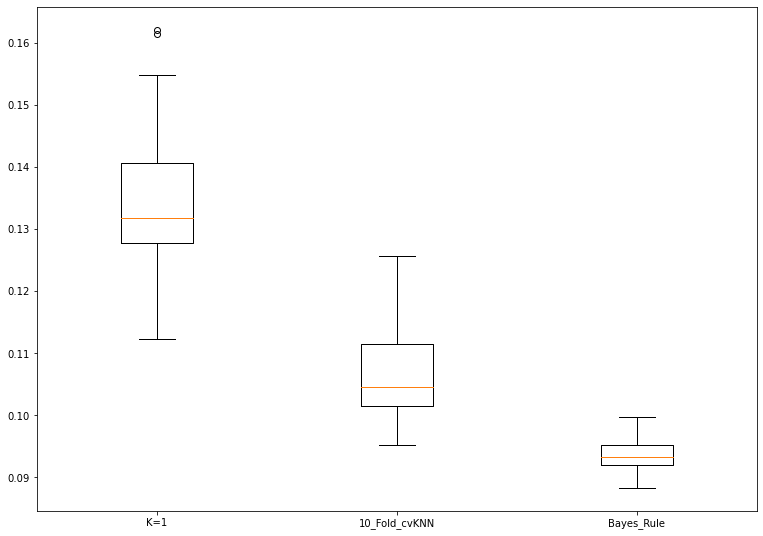

In [34]:
data = [one_knn_errs, best_k_errs, bayes_errs]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3], ['K=1', '10_Fold_cvKNN', 'Bayes_Rule'])
# show plot
plt.show()

### Member Contributions

Matthew: Part 1

Jack: Part 2, Part 3

Worked together: Part 4 and final report formatting